In [3]:
import csv
import pandas as pd
import numpy as np
from sklearn import cross_validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import *
from math import sqrt
from sklearn.cross_validation import LeaveOneOut
from sklearn.cross_validation import KFold, cross_val_score
from sklearn import datasets, linear_model
from sklearn import datasets, linear_model
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import LeaveOneOut
from sklearn.preprocessing import scale 
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from math import sqrt
from tqdm import tqdm
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
%matplotlib inline
import matplotlib.pyplot as plt

C:\Users\gaurang\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\gaurang\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
Data = pd.DataFrame.from_csv('normalizedData.csv')

In [5]:
Data.head()

,Appliances,lights,temp_kitchen,hum_kitchen,temp_living,hum_living,temp_laundry,hum_laundry,temp_office,hum_office,...,Num_sec_midnight,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,WeekDay,Weekend
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,3.301180,-1.118616,1.843774,-0.520398,1.073656,-1.235032,1.686087,-0.908194,1.506399,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 17:10:00,60,3.301180,-1.118616,1.616766,-0.520398,1.057071,-1.235032,1.704523,-0.908194,1.604488,...,140.474197,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 17:20:00,50,3.301180,-1.118616,1.517921,-0.520398,1.033523,-1.235032,1.748563,-0.944091,1.580878,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 17:30:00,50,4.561263,-1.118616,1.459284,-0.520398,1.024514,-1.235032,1.769047,-0.962039,1.542487,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 17:40:00,60,4.561263,-1.118616,1.526298,-0.520398,1.009771,-1.235032,1.769047,-0.962039,1.497953,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0


## Holdout sets

In [6]:
train = pd.DataFrame.from_csv("train.csv")
test = pd.DataFrame.from_csv("test.csv")
X_train = train.iloc[:,:len(train.columns)-1]
y_train = train.iloc[:,len(train.columns)-1]
X_test = test.iloc[:,:len(test.columns)-1]
y_test = test.iloc[:,len(test.columns)-1]

## Validation Curve

In [9]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 250, 2)
train_scores, test_scores = validation_curve(RandomForestRegressor(), 
                                             X_train, 
                                             y_train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="r2", 
                                             n_jobs=-1)

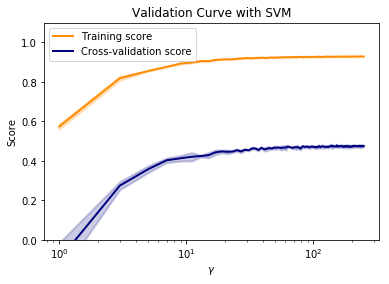

In [10]:

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [13]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 250, 2)
train_scores, test_scores = validation_curve(GradientBoostingRegressor(), 
                                             X_train, 
                                             y_train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="r2", 
                                             n_jobs=-1)

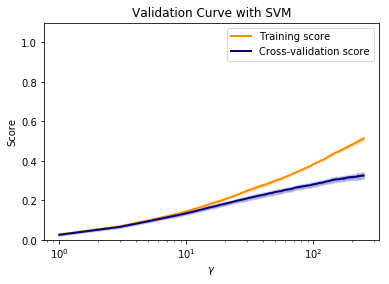

In [14]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## Cross Validation

### K-fold

In [11]:
#GBM
model = GradientBoostingRegressor(n_estimators=1500, learning_rate=0.1,max_depth=4, random_state=0, loss='ls').fit(X, y)

In [12]:

k_fold = KFold(len(y), n_folds=10, shuffle=True, random_state=0)
print (cross_val_score(model, X, y, cv=k_fold, n_jobs=1))

[ 0.51596998  0.52889133  0.52898749  0.53374406  0.52356115  0.5181723
  0.54088485  0.52148472  0.58003088  0.55897463]


In [68]:
#RandomForest
RF= RandomForestRegressor(n_estimators=300,max_depth=4,)
model2=RF.fit(X,y)

In [22]:
k_fold = KFold(len(y), n_folds=10, shuffle=True, random_state=0)
print (cross_val_score(model2, X, y, cv=k_fold, n_jobs=1))

[0.12739586 0.14106554 0.16019255 0.1566742  0.11456478 0.1316116
 0.13834619 0.15287295 0.1728952  0.14669629]


In [71]:
#Linear
k_fold = KFold(len(y), n_folds=10, shuffle=True, random_state=0)
lm = linear_model.LinearRegression()
model3 = lm.fit(X, y)
print (cross_val_score(model3, X, y, cv=k_fold, n_jobs=1))

In [7]:
#NeuralNetwork
mlp = MLPRegressor(hidden_layer_sizes=(50,50,50,50,50),max_iter=500)
mlp.fit(X,y)
train_predict=mlp.predict(X)
print (cross_val_score(mlp, X, y, cv=k_fold, n_jobs=1))


[0.36643616 0.36945491 0.36409526 0.35757147 0.3805682  0.3805224
 0.40229774 0.41789279 0.40343481 0.34727024]


### Leave One Out

In [ ]:
#GBM
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)), n_jobs=8, verbose=2)
scores

[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  4.2min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed: 21.0min
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed: 49.6min


In [ ]:
#Neural Network
scores = cross_val_score(mlp, X, y, cv=LeaveOneOut(len(X)), n_jobs=8, verbose=2)
scores

[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed: 388.9min


In [ ]:
#Random forest
scores_rf = cross_val_score(model2, X, y, cv=LeaveOneOut(len(X)))
scores_rf

In [25]:
#LinearRegression
scores3 = cross_val_score(model3, X, y, cv=LeaveOneOut(len(X)), n_jobs=8, verbose=2)
scores3

[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   27.2s
[Parallel(n_jobs=8)]: Done 372 tasks      | elapsed:   29.1s
[Parallel(n_jobs=8)]: Done 1184 tasks      | elapsed:   33.6s
[Parallel(n_jobs=8)]: Done 2316 tasks      | elapsed:   40.0s
[Parallel(n_jobs=8)]: Done 3776 tasks      | elapsed:   48.1s
[Parallel(n_jobs=8)]: Done 5556 tasks      | elapsed:   57.8s
[Parallel(n_jobs=8)]: Done 7664 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 10092 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 12848 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 15924 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done 19328 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 19720 out of 19735 | elapsed:  2.3min remaining:    0.0s
[Parallel(n_jobs=8)]: Done 19735 out of 19735 | elapsed:  2.3min finished


array([0., 0., 0., ..., 0., 0., 0.])

# Lasso Regression

In [23]:
alphas = 10**np.linspace(10,-2,100)*0.5
lasso = Lasso(alpha= 0,max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
pred = lasso.predict(X_test)

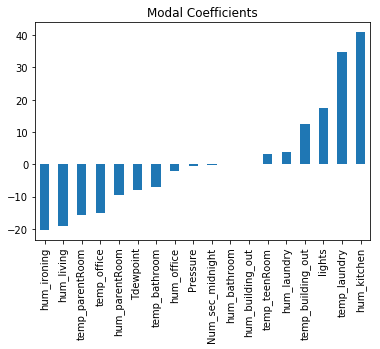

In [39]:
predictors = X_train.columns
coefs = pd.Series(lasso.coef_,predictors).sort_values()
coefs.plot(kind='bar', title='Modal Coefficients')

## LassoCV

In [49]:
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

pred_test=lasso.predict(X_test)
mean_squared_error(y_test, lassocv.predict(X_test))

10650.179025823614

In [50]:

r2_score(y_test,pred_test)

0.020680150424673638

## Ridge

### Alpha Value=4

In [52]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X_train.columns)) # Print coefficients
print("Mean_Square",mean_squared_error(y_test, pred2))          # Calculate the test MSE

lights               3.586090e+01
hum_kitchen          1.715271e+01
hum_living          -1.146545e+01
temp_laundry         8.530177e+00
hum_laundry          6.239689e+00
temp_office          1.329891e+00
hum_office           1.640862e+00
temp_bathroom       -8.420544e-01
hum_bathroom         9.319668e-01
temp_building_out    1.157327e+01
hum_building_out    -4.257555e+00
hum_ironing         -7.858957e+00
temp_teenRoom        2.388946e+00
temp_parentRoom     -1.804204e+00
hum_parentRoom      -7.324282e+00
Pressure            -3.936877e+00
Tdewpoint           -9.087726e-01
Num_sec_midnight    -1.480205e-12
dtype: float64
Mean_Square 10339.8893777


### Alpha = 10**10

In [53]:
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index = X_train.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))          # Calculate the test MSE

lights               1.776388e-08
hum_kitchen          7.739085e-09
hum_living          -5.363827e-09
temp_laundry         5.406176e-09
hum_laundry          2.307141e-09
temp_office          2.498462e-09
hum_office           7.486585e-10
temp_bathroom        1.354518e-09
hum_bathroom         3.868356e-10
temp_building_out    6.727257e-09
hum_building_out    -2.796849e-09
hum_ironing         -3.360450e-09
temp_teenRoom        2.658894e-09
temp_parentRoom      7.774290e-10
hum_parentRoom      -3.455197e-09
Pressure            -2.216885e-09
Tdewpoint            7.411781e-10
Num_sec_midnight    -5.561036e-22
dtype: float64
10650.1790256


### Alpha = 0

In [54]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X_train.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE

lights               1.600402e+02
hum_kitchen          4.234929e+02
hum_living          -1.757733e+02
temp_laundry         2.563175e+02
hum_laundry          5.397860e+01
temp_office         -1.146901e+02
hum_office          -7.953566e+01
temp_bathroom       -4.764717e+01
hum_bathroom         2.861358e+00
temp_building_out    1.166675e+02
hum_building_out     1.701818e+01
hum_ironing         -9.863231e+01
temp_teenRoom        5.066898e+01
temp_parentRoom     -1.041847e+02
hum_parentRoom      -6.367303e+01
Pressure             1.568353e+00
Tdewpoint           -6.048874e+01
Num_sec_midnight    -1.372573e-11
dtype: float64
9112.28211998


## RidgeCV

In [55]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.0050000000000000001

In [56]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

9115.837225415733

In [57]:
ridge4.fit(X_train, y_train)
pd.Series(ridge4.coef_, index = X_train.columns)
ridge4.score(X_test,y_test)

0.14399724271994974

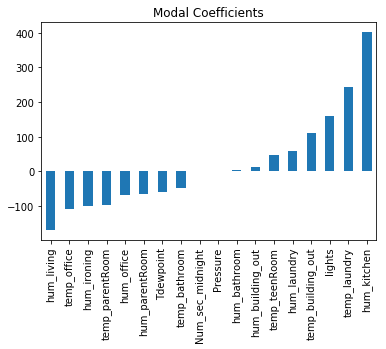

In [58]:
predictors = X_train.columns
coefs = pd.Series(ridge4.coef_,predictors).sort_values()
coefs.plot(kind='bar', title='Modal Coefficients')

## ElasticNet

In [59]:
ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(X_train,y_train)
pred_cv = ENreg.predict(X_test)
#ENreg.score(X_test,y_test)
r2_score(y_test,pred_cv)


0.0047839411134229515

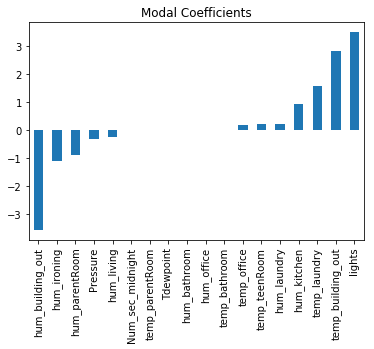

In [60]:
predictors = X_train.columns
coefs = pd.Series(ENreg.coef_,predictors).sort_values()
coefs.plot(kind='bar', title='Modal Coefficients')

## GridSearchCV

In [99]:
rf= RandomForestRegressor(n_estimators=300,max_depth=4,)

In [82]:
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

In [86]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model3,parameters, cv=None)
grid.fit(X, y)
print("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  -4.009912178078779e+19
Residual sum of squares: 9097.55


In [101]:
rf = RandomForestRegressor()
param_grid = { 
        "n_estimators"      : [100,200,300]
        }
grid = GridSearchCV(rf,param_grid,cv=10)

grid.fit(X_train, y_train)
# pred_rf=grid.predict(X_test)
# print("Residual sum of squares: %.2f"
#               % np.mean((grid.predict(X_test) - y_test) ** 2))
print(grid.best_score_)
print(grid.best_params_)

0.5179801145867352
{'n_estimators': 200}


In [102]:
print(grid.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [7]:
gb= GradientBoostingRegressor()
param_grid = { 'n_estimators': [1000, 1500], 'learning_rate': [0.1,0.8, 1.0] , 'max_depth' : [4,5] }
grid = GridSearchCV(gb,param_grid,cv=10)

grid.fit(X_train, y_train)
# pred_rf=grid.predict(X_test)
# print("Residual sum of squares: %.2f"
#               % np.mean((grid.predict(X_test) - y_test) ** 2))
print(grid.best_score_)
print(grid.best_params_)

0.5023166046215263
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1500}


In [8]:
print(grid.best_estimator_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
